In [2]:
!pip install -r requirements.txt

     |████████████████████████████████| 11.1 MB 4.0 MB/s eta 0:00:01    |██████████████████████▍         | 7.8 MB 3.2 MB/s eta 0:00:02
     |████████████████████████████████| 4.0 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 123 kB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 139 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 256 kB 4.2 MB/s eta 0:00:01     |███████████████▎                | 122 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 15 kB/s  eta 0:00:01     |██████████                      | 10.9 MB 6.5 MB/s eta 0:00:04     |█████████████████▋              | 19.1 MB 2.2 MB/s eta 0:00:07     |███████████████████▋            | 21.2 MB 2.1 MB/s eta 0:00:07     |████████████████████            | 21.7 MB 2.1 MB/s eta 0:00:07
     |████████████████████████████████| 302 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 377 kB 4.5

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

csv_path = "/home/thiago/ia/A3/src/CAR_DETAILS_FROM_CAR_DEKHO.csv"

# Carregar o conjunto de dados
data = pd.read_csv(csv_path)

# Exibir as primeiras linhas do conjunto de dados
data.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


## Tipo de data

In [46]:
type(data)

pandas.core.frame.DataFrame

# Separar as características (features) e o alvo (target)

In [93]:
# Separar as características (features) e o alvo (target)
X = data[['year', 'km_driven']]  # Características
y = data['selling_price']  # Alvo

# Dividir o conjunto de dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar um modelo de regressão linear
model = LinearRegression()
# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = model.predict(X_test)

array([ 473039.8163954 ,  646369.12073018,  130234.84330724,
        556011.1512787 ,  770943.18055178,  345778.78440133,
        616963.48959935,  381944.02485219,  803130.31576148,
        438436.17139685,  857903.26248196,  698213.22878185,
        742770.91524469,   58961.17320479,  488344.74136773,
        587854.472525  , 1061599.03995623,  531893.4711737 ,
        132984.97537418,  722488.28864519,  770943.18055178,
        873992.40480571,  589228.43373436,  907860.61646856,
        428107.21037103,  742770.91524469,  811336.21322945,
        356794.89511651,  520699.67092376,  687009.14732343,
        -47697.3403047 ,  750893.71216171,  745683.03454757,
        865396.76366068,  649903.03608612,  516564.02922937,
        933261.77521569,  606162.53956578,  162874.68657691,
        641724.16181176,  695278.21701755,  603622.42369106,
        847308.59260817,  495102.8105073 ,  502646.6541565 ,
        442792.38478547,  520324.25087124,  573200.41339446,
        840124.19314286,

# Avaliar o desempenho do modelo

In [97]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
print(f"Erro quadrático médio: {mse}")
print(f"r2 {r2}")
print(f"Erro médio absoluto {mae}")
print(f"Erro médio percentual absoluto {mape}")

Erro quadrático médio: 238316812611.40668
r2 0.21906940656281437
Erro médio absoluto 251770.47989593758
Erro médio percentual absoluto 0.7826328203056403


# Visualizar as previsões em comparação com os valores reais

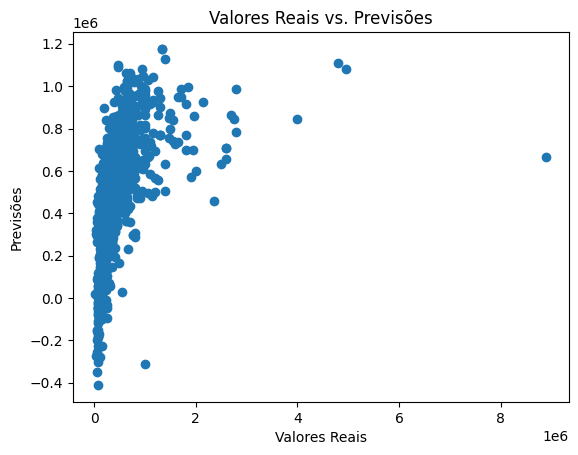

In [98]:
plt.scatter(y_test, predictions)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Valores Reais vs. Previsões")
plt.show()